> ## <span style ="color:orange">**Veri Bilimi için istatislik**</span>

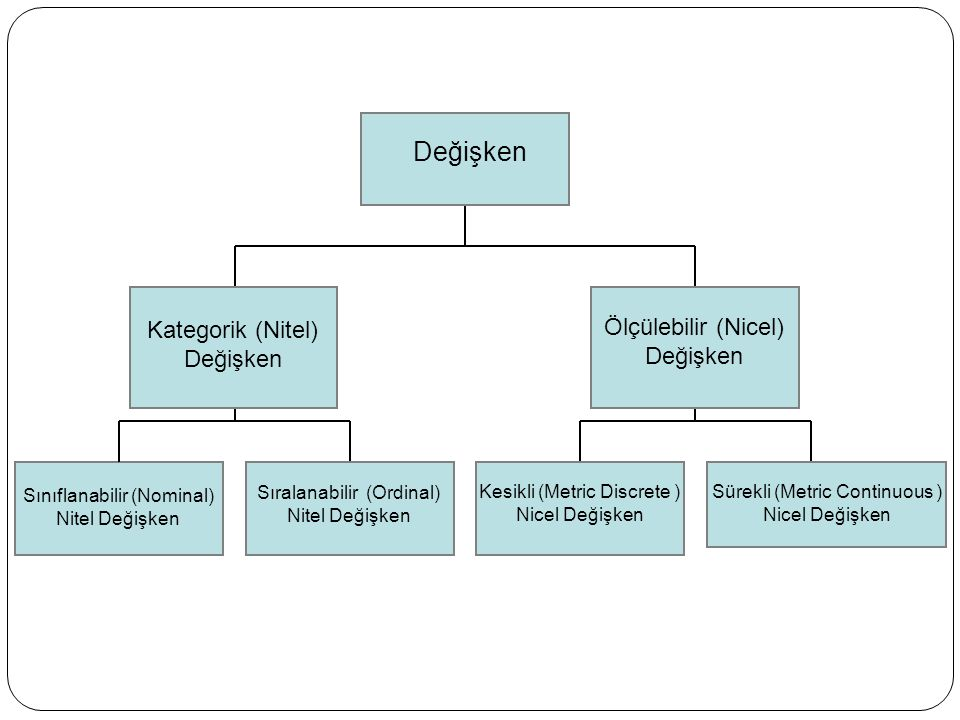

In [2]:
from IPython import display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
display.Image("slide_6.jpeg")

| Değişken Tipi | Açıklama | Örnek | Analiz Türleri |
| --- | --- | --- | --- |
| Kategorik (Nominal) | Kategorik değerler | Renkler, cinsiyet | Frekans tablosu, Ki-Kare testi |
| Kategorik (Ordinal) | Sıralı kategorik değerler | Eğitim seviyesi, sınıf derecesi | Frekans tablosu, Non-parametrik testler |
| Sürekli (Oran) | Sayısal değerler, mutlak sıfır | Yaş, gelir | Merkezi eğilim, dağılım, t-testi, ANOVA |
| Sürekli (Aralık) | Sayısal değerler, ancak mutlak sıfır yok | Sıcaklık, IQ puanı | Merkezi eğilim, dağılım, t-testi, ANOVA |
| Kesikli | Ayrık, sayılabilir değerler | Çocuk sayısı, öğrenci sayısı | Frekans tablosu, Poisson regresyonu |
| Bağımlı | Bir bağımsız değişkenle ilişkili | Test öncesi ve sonrası skorlar | Bağımlı iki örneklem t-testi, İkili regresyon |
| İşaretli | İki kategorik değişkenin kesişimi | Cinsiyet ve sigara içme durumu | İki yönlü ANOVA, Ki-Kare testi |


> # İstatistik ve İstatistik Yöntemleri

- İstatistik ve İstatistik Yöntemleri
  - Merkezi Eğilim Ölçüleri
    - Ortalama
    - Medyan
    - Mod
  - Dağılım Ölçüleri
    - Standart Sapma
    - Varyans
    - Çeyrekler Arası Aralık (IQR)
  - Hipotez Testleri
    - Tek Örneklem T-Testi
    - İki Örneklem T-Testi
    - ANOVA
  - Regresyon Analizi
    - Doğrusal Regresyon
    - Lojistik Regresyon
  - İstatistiksel Testler
    - Ki-Kare Testi
    - Mann-Whitney U Testi
    - Wilcoxon İşaretli Sıralar Testi


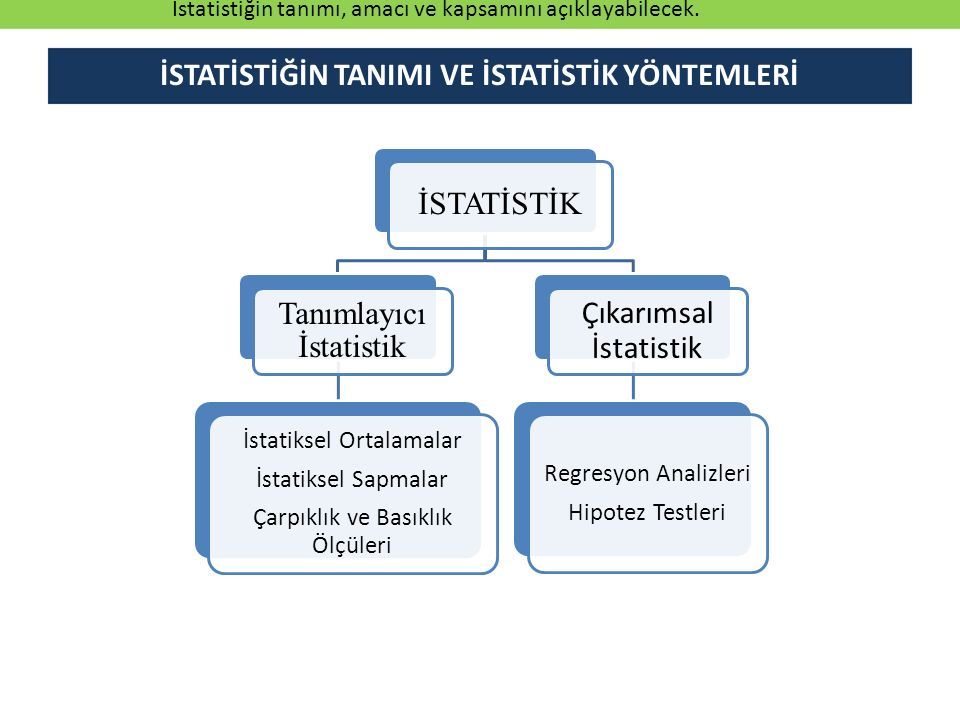

In [3]:
display.Image("İSTATİSTİĞİN+TANIMI+VE+İSTATİSTİK+YÖNTEMLERİ.jpeg")

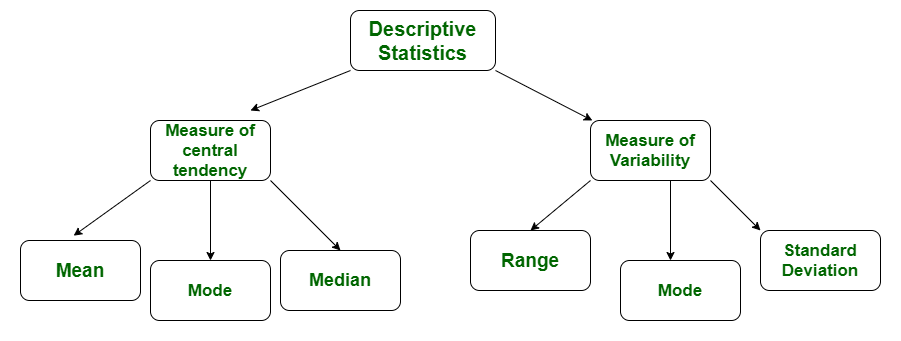

In [4]:
display.Image("NEWdescriptive.png")

### **Not**:
- **Kolerasyon iki değişken arasındaki ilişkini şiddetini ve yönü hakkında bilgi verir [-1,1] arasında değer alır**
- **Kovaryans iki değişken arasındaki ilişkini yönünü verir + ise değişkenler arasında pozitif bir bağ, - ise   negatfi bir bağ olduğunu söyler**

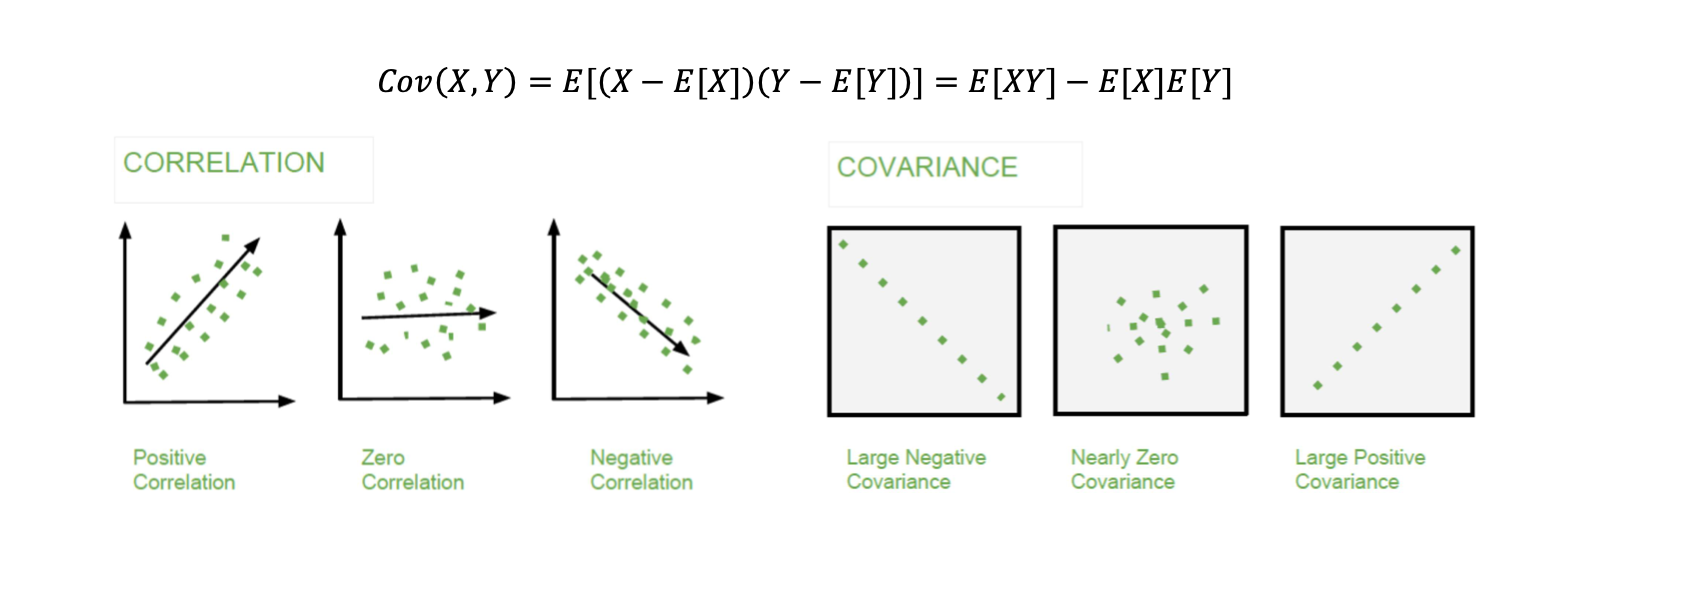

In [5]:
display.Image("korelasyon_kovaryans.png")

> # <span style ="color:orange">**Merkezi Limit Teoremi**</span>
- **Populasyon içerisineden alınan örneklerin ortalamalarının dağılımı normal dağılıma benzeme eğilimindedir.**

- **Alınan sample fazla ise normal dağılıma daha fazla benzer.**

Sample Varyansı:   $s^2 = \frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{n-1}$               <<<<<<<<>>>>>>>>>>>>>     Sample Standart Sapma: $s = \sqrt{\frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{n-1}}$


Popülasyon Varyansı: $\sigma^2 = \frac{\sum_{i=1}^{N}(X_i - \mu)^2}{N}$           <<<<<<<<>>>>>>>>>>>>>         Popülasyon Standart Sapması: $\sigma = \sqrt{\frac{\sum_{i=1}^{N}(X_i - \mu)^2}{N}}$



> ### Örnek teorisi 

In [6]:
import numpy as np
populasyon=np.random.randint(0,80,10000)
populasyon[0:10]

array([17, 61, 48, 33,  9, 48, 34,  3, 37, 12])

In [7]:
#örneklem çekimi
np.random.seed(10)
örneklem=np.random.choice(a=populasyon,size=100)
print(f'örneklem  mean : {örneklem.mean()}')
print(f'populasyon  mean : {populasyon.mean()}')

örneklem  mean : 34.08
populasyon  mean : 39.4048


In [8]:
#örneklem dağılımı
dic={}
for i in range(1,11):
    ör=np.random.choice(a=populasyon,size=100)
    dic.update({'örneklem'+str(i):ör}) 
dic.keys()

dict_keys(['örneklem1', 'örneklem2', 'örneklem3', 'örneklem4', 'örneklem5', 'örneklem6', 'örneklem7', 'örneklem8', 'örneklem9', 'örneklem10'])

In [9]:
list_örneklem_mean=[]
for i in list(dic.keys()):
    list_örneklem_mean.append(dic[i].mean())
list_örneklem_mean

[39.31, 41.4, 43.28, 35.63, 37.79, 37.15, 38.63, 39.08, 36.35, 41.54]

- **Aldığımız örneklemlerin ortalaması Populasyonumuzun ortalamsına yakın olmasını bekleriz.**

In [12]:
print(f'Aldığımız örneklemelerin ortalamalarının mean : {np.array(list_örneklem_mean).mean()}')
print(f'populasyon  mean : {populasyon.mean()}')

Aldığımız örneklemelerin ortalamalarının mean : 39.016000000000005
populasyon  mean : 39.4048


 > ## <span style ="color:orange">**Betimsel İstatistikler**</span>


In [13]:
import seaborn as sns
import researchpy
from scipy import stats
tips=sns.load_dataset('tips')
df=tips.copy()
df.head()
print('\n')
df.describe().T
print('\n')
df.info()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [14]:
#Sadece Sürekli değişkenlerimizi tanımlayıcı özellikleri
df.select_dtypes(include=['int64','float']).describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [15]:
#researchpy.summary_cat(df[['sex','smoker','day']])  #Kategorik değişken tanımları

> ## <span style="color:orange">**Korelasyon ve Kovaryans**</span>

$\text{cor}(X, Y) = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2}\sum{(Y_i - \bar{Y})^2}}}$

$\text{cov}(X, Y) = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{n}$


In [16]:
print('Covaryansda değişkenler arasında nedensellik aranmaz.Çıkan Covaryans degeri ilişkinin gücü hakkında bilgi vermez.')
df[['tip','total_bill']].cov()  
print('\nÇıkan Kolerasyon degeri ilişkinin gücü hakkında bilgi verir.')
df[['tip','total_bill']].corr()

Covaryansda değişkenler arasında nedensellik aranmaz.Çıkan Covaryans degeri ilişkinin gücü hakkında bilgi vermez.


,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939



Çıkan Kolerasyon degeri ilişkinin gücü hakkında bilgi verir.


,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


> ## <span style="color:orange">**Güven aralığı**</span>
- **Anakütle parametresinin tahmini değerini kapsayabilecek iki sayıdan oluşan bir aralık bulunmasıdır**
- **Yapmış olduğumuz tahminin ne kadar güvenilir olduğu ile alakalı bir değer bize sunar**

### **İş uygulaması :Fiyat stratejisi karar destek**

In [17]:
import numpy as np
import statsmodels.stats.api as sms
fiyatlar=np.random.randint(10,110,1000)
fiyatlar[:20]
fiyatlar.mean()

array([ 57,  37,  48,  19,  53,  24,  59, 104,  14,  33,  86,  52,  42,
        89,  89,  48,  58, 108,  98,  77])

58.35

In [18]:
g=sms.DescrStatsW(fiyatlar).tconfint_mean()
                                            #%95 güven aralığında tahminlerimizi yapar. 
                                            #Burda %95 değeri varsayılan değerdir değiştirilebilir.
print('Fiyatlar  %95 güven aralığı ile {} ile {} arasındadır.'.format(g[0],g[1]))

Fiyatlar  %95 güven aralığı ile 56.53235961538421 ile 60.167640384615794 arasındadır.


> ## <span style="color:orange">**Olasılık Dağılımları**</span>

> ##### <span style="color:grey" >**Kesikli Olasılık Dağılımları(non-Gaussian distribution)**</span>
** **
- #### Bernoulli Dağılımı
$X \sim \text{Bernoulli}(p)$, $P(X = k) = \begin{cases} p, & \text{if } k = 1 \\ (1-p), & \text{if } k = 0 \end{cases}$


- #### Binom Dağılımı
$X \sim \text{Binomial}(n, p)$, $P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$


- #### Poisson Dağılımı
$X \sim \text{Poisson}(\lambda)$, $P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}$






> ##### <span style="color:grey" >**Sürekli Olasılık Dağılımları (The Gaussian distribution is part of the Exponential family of distributions)**</span>
** **
- #### Normal Dağılım
$X \sim \mathcal{N}(\mu, \sigma^2)$, $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

- #### Üniform Dağılım
$X \sim \text{Uniform}(a, b)$, $f(x) = \begin{cases} \frac{1}{b-a}, & \text{if } a \leq x \leq b \\ 0, & \text{otherwise} \end{cases}$

- #### Üstel Dağılım
$X \sim \text{Exponential}(\lambda)$, $f(x) = \begin{cases} \lambda e^{-\lambda x}, & \text{if } x \geq 0 \\ 0, & \text{if } x < 0 \end{cases}$


> ## <span style="color:orange">**Büyük Sayılar Yasası**</span>
**Bir rassal değişkenin uzun vadeli kararlığını tanımlayan olasılık teoremidir.
Kanun kabaca bildiğimiz günlük bir gerçeğin matematiksel ispatıdır.Büyük Sayılar Yasası, bir deneyin pratikte gözlenen başarı oranının, deneme sayısı arttıkça teoride beklenen istatistiki sonuca giderek yaklaşma eğiliminde olduğunu belirten bir yasadır. Bunun sebebi, örneklem büyüklüğü ne kadar fazlaysa, bu örneklemin genel popülasyonun niteliklerini yansıtma ihtimalinin o kadar yüksek olmasıdır.**

In [19]:
#Bu örnekte  bir demir para için yazı veya tura gelme olasğını %50 olduğunu biliyoruz ama parayaı attığımızda sürekli olrak yazı,tura,yazı,tura... gibi sonuçların sıralı olarak gelmedğini biliyozu .
#Örneğin 4 defa attığımzda 1 defa tura 3 defa yazı gelebilir.
# Ama populasyon ortalması %50 idi yani 2 yazı 2 tura gelmesini bekliyorduk işte burada deneme sayımız ne kadar çok artarsa Populasyonun oranınını yani %50 ye o kadar yaklaşırız.

rng=np.random.RandomState(123)
for i in np.arange(1,21):
    deney_sayisi=2**i
    yazi_turalar=rng.randint(0,2,size=deney_sayisi)
    mean=np.mean(yazi_turalar)
    print('deney sayisi : ',deney_sayisi,' ortalama : %.2f' % mean)

deney sayisi :  2  ortalama : 0.50
deney sayisi :  4  ortalama : 0.00
deney sayisi :  8  ortalama : 0.62
deney sayisi :  16  ortalama : 0.44
deney sayisi :  32  ortalama : 0.47
deney sayisi :  64  ortalama : 0.56
deney sayisi :  128  ortalama : 0.51
deney sayisi :  256  ortalama : 0.53
deney sayisi :  512  ortalama : 0.53
deney sayisi :  1024  ortalama : 0.50
deney sayisi :  2048  ortalama : 0.49
deney sayisi :  4096  ortalama : 0.49
deney sayisi :  8192  ortalama : 0.50
deney sayisi :  16384  ortalama : 0.50
deney sayisi :  32768  ortalama : 0.50
deney sayisi :  65536  ortalama : 0.50
deney sayisi :  131072  ortalama : 0.50
deney sayisi :  262144  ortalama : 0.50
deney sayisi :  524288  ortalama : 0.50
deney sayisi :  1048576  ortalama : 0.50


> ## <span style="color:orange">**Bernouli Dağılımı**</span>



- ##### <span style="color:Red">**Bernouli**</span> **Başarılı-Başarısız,Olumlu-Olumsuz sonucunda ikili sonuçlu olaylar ile ilgilenen kesikli olasılık dağılılımıdır.**
**  **

$X \sim \text{Bernoulli}(p)$, $P(X = k) = \begin{cases} p, & \text{if } k = 1 \\ (1-p), & \text{if } k = 0 \end{cases}$

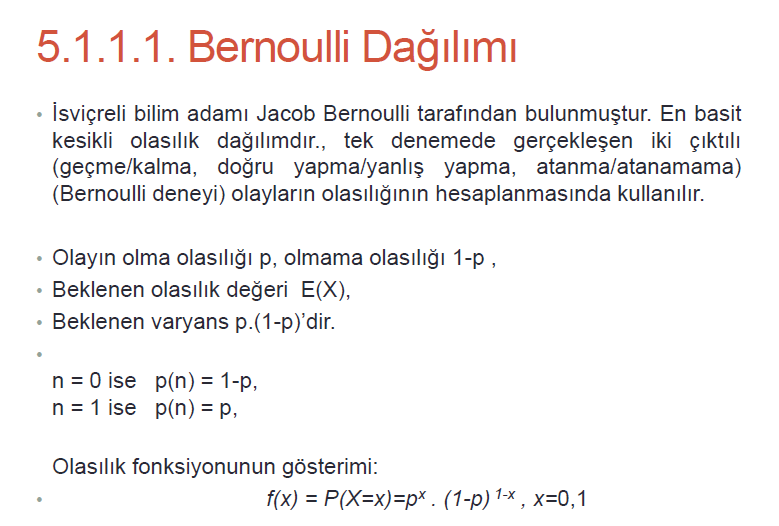

In [20]:
import numpy as np
import matplotlib.pyplot as plt
display.Image("bernouli.png")

In [21]:
from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
p=0.6
rv=bernoulli(p)
rv.pmf(k=0) # 0 olması durumu 

0.4000000000000001

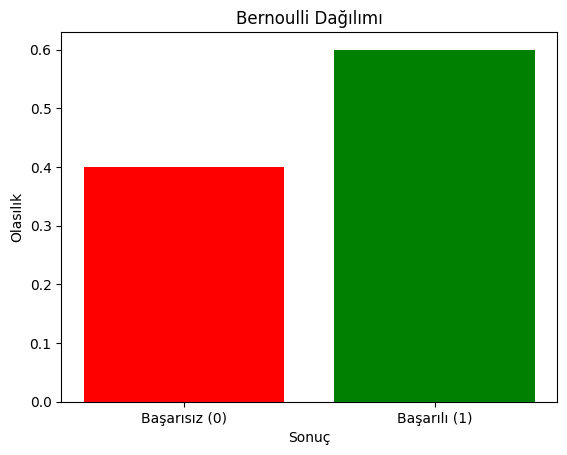

In [23]:
# Bernoulli dağılımı için parametre
p = 0.6  # Başarı olasılığı
# Olası sonuçlar (Başarı veya Başarısız)
outcomes = [0, 1]
# Olasılıklar
probabilities = [1 - p, p]
# Grafik çizimi
plt.bar(outcomes, probabilities, color=['red', 'green'])
plt.title('Bernoulli Dağılımı');
plt.xlabel('Sonuç');
plt.ylabel('Olasılık');
plt.xticks(outcomes, ['Başarısız (0)', 'Başarılı (1)']);
plt.show();

> ## <span style="color:orange">**Binom dağılımı**</span>

- ##### <span style="color:Red">**Binom :**</span> **Binom dağılım bernoullinin  n deneme sonucu k/x  başarılı olma olasılığı ile ilgilenildiğinde kullanılan dağılımdır. P başarı sayısı**
** **
$X \sim \text{Binomial}(n, p)$, $P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$


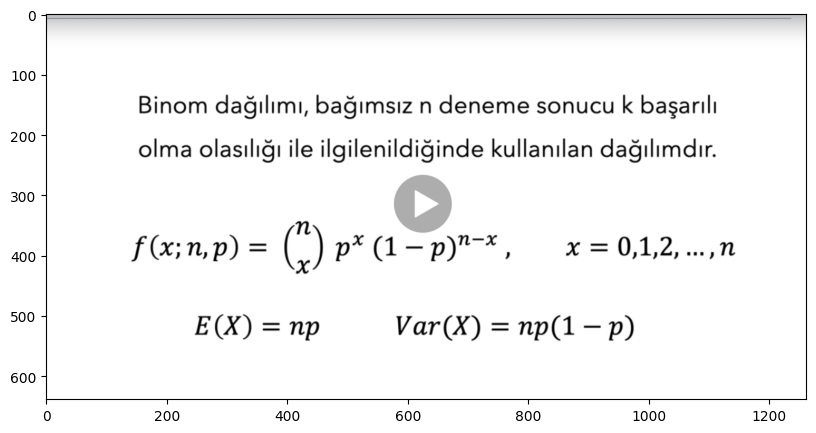

In [25]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from scipy.stats import binom
image = mpimg.imread("binom.png")
plt.figure(figsize=(10,5));
plt.imshow(image);
plt.show();

**1. Grafik bize şunu söyler:**
   Eğer 2 sonuçlu bir deney \(n\) kez tekrarlanırsa, belirlenen gerçekleşme olasılığı günün sonunda normal dağılım olacaktır.

**2. Bu grafik, belirli bir binom dağılımını temsil eder ve belirli bir deneme sayısı (\(n\)) ile başarı olasılığı (\(p\)) kombinasyonu için başarı sayılarının olasılıklarını gösterir.**

**3. Grafikte:**
   - \(x\)-ekseni başarı sayılarını,
   - \(y\)-ekseni ise bu başarı sayılarının gerçekleşme olasılıklarını temsil eder.

**4. Her bir çubuk:**
   - Belirli bir başarı sayısının olasılığını gösterir.

**5. Örneğin:**
   Yukarıdaki örnekte \(n=10\) (toplam deneme sayısı) ve \(p=0.5\) (başarı olasılığı) olarak ayarlandı. Bu durumda grafik, 0'dan 10'a kadar olan başarı sayılarının olasılıklarını gösterir.

**6. Özel bir odaklanma:**
   - Eğer \(x=5\)'e odaklanırsak, bu, 10 denemede tam olarak 5 başarı elde etme olasılığını ifade eder.

**7. Kullanım Alanları:**
   - Bu tür bir grafik, belirli bir durumun olasılığını anlamak için kullanılır.
   - Örneğin, bir madeni paranın adil olup olmadığını kontrol etmek veya bir oyunda belirli bir başarı elde etme olasılığını değerlendirmek gibi durumlar için binom dağılımı kullanılabilir.


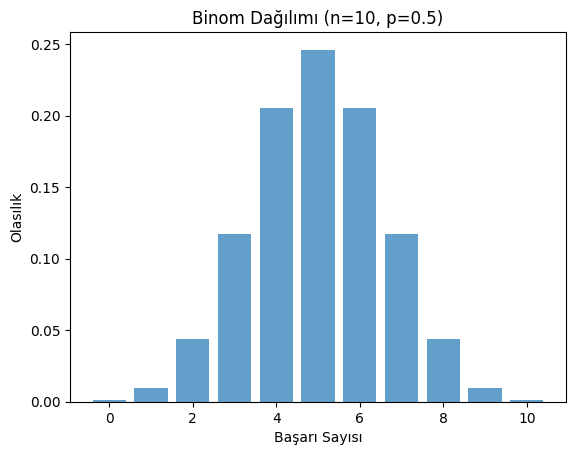

In [13]:
def plot_binomial_distribution(n, p):
    x = range(n + 1)
    y = [binom.pmf(i, n, p) for i in x]
    plt.bar(x, y, align='center', alpha=0.7)
    plt.title(f'Binom Dağılımı (n={n}, p={p})')
    plt.xlabel('Başarı Sayısı')
    plt.ylabel('Olasılık')
    plt.show()
# Örnek kullanım
plot_binomial_distribution(n=10, p=0.5)

In [16]:
#Bu satırlar, sırasıyla 1, 5 ve 10 başarı sayısı için olasılıkları hesaplar ve ekrana yazdırır.
#Bu örnekte, reklamın tıklanma olasılığı çok düşük olduğu için (0.01), genellikle çok az tıklanma olasılığına sahip olacaktır.
#Bu çıktılar, sırasıyla 1, 5 ve 10 tıklama olasılıklarını gösterir. Eğer başarı olasılığı çok düşükse, genellikle az tıklanma olasılığına sahip olacaksınız. 
from scipy.stats import binom
p=0.01
n=100
rv=binom(n,p)           
print(f'Reklamın  100 denemede ,1 kere tıklanma olasığı:{rv.pmf(1)}') 
print(f'Reklamın 100 denemede ,5 kere tıklanma olasığı:{rv.pmf(5)}')  
print(f'Reklamın 100 denemede ,10 kere tıklanma olasığı:{rv.pmf(10)}')  

Reklamın  100 denemede ,1 kere tıklanma olasığı:0.36972963764972666
Reklamın 100 denemede ,5 kere tıklanma olasığı:0.0028977871237614783
Reklamın 100 denemede ,10 kere tıklanma olasığı:7.006035693977194e-08


> ## <span style="color:orange">**Poisson dağılımı**</span>


- ##### <span style="color:Red">**Poisson :**</span> **Belirli bir zaman aralığında belirli bir alanda nadiren rastlanan olayların olasılıklarını hesaplamak için kullanılır.Bu dağılım, özellikle düşük olasılıklı nadir olayların incelendiği durumlarda kullanışlıdır.**

** **

$X \sim \text{Poisson}(\lambda)$, $P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}$


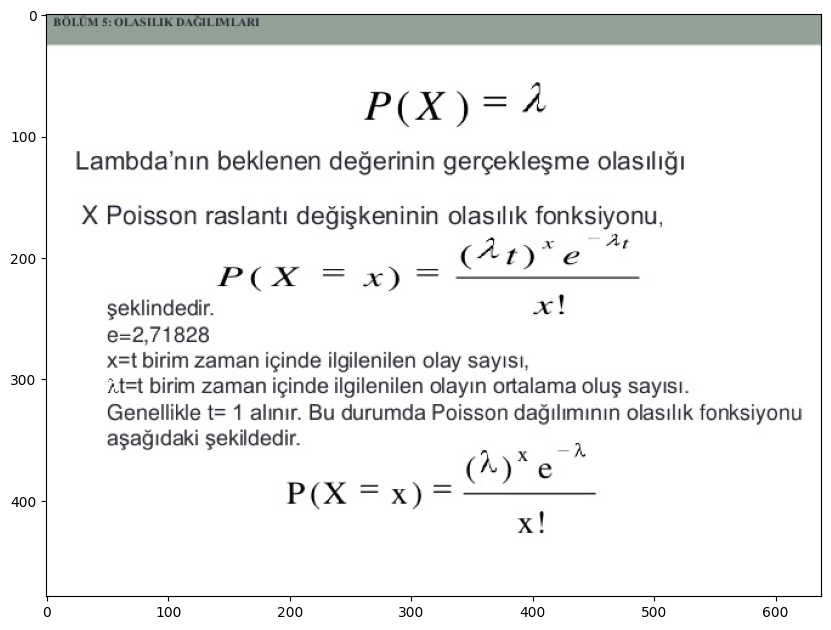

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("poisson.jpg")
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

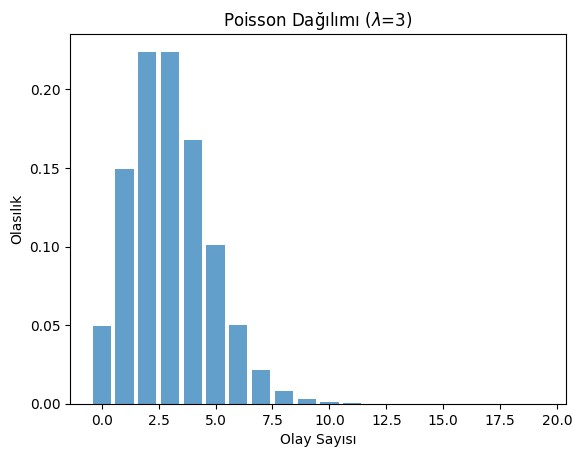

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import poisson

def plot_poisson_distribution(lambda_param):
    x = range(0, 20)  # Olay sayıları 0'dan 19'a kadar
    y = [poisson.pmf(i, lambda_param) for i in x]

    plt.bar(x, y, align='center', alpha=0.7)
    plt.title(f'Poisson Dağılımı ($\lambda$={lambda_param})')
    plt.xlabel('Olay Sayısı')
    plt.ylabel('Olasılık')
    plt.show()

# Örnek kullanım
lambda_param = 3
plot_poisson_distribution(lambda_param)


In [1]:
from scipy.stats import poisson
lambda_=0.1
rv=poisson(mu=lambda_)
print(rv.pmf(k=0)) #hiç hata olmaması olasılığı. NOT: Poisson bir veride hata olma olasılığının az olduğu bilindiğinde hatanın olma olasılığı nedir onu bulur 
print(rv.pmf(k=3)) #3 tane hata olma olasılığı

0.9048374180359595
0.00015080623633932676


> ## <span style="color:orange">**Normal Dağılım**</span>


- ##### <span style="color:Red">**Normal Dağılım  :**</span> **Normal dağılımın Ortalama ve medyan ve mod u eşittir; her ikisi de dağılım merkezindedir Verinin yaklaşık 68'i ortalamanın 1 standart sapma içine düşer,Verinin yaklaşık 95'i ortalamanın 2 standart sapma içine düşer,Verinin yaklaşık 99,7'si ortalamanın 3 standart sapma içine düşer**

** **

$X \sim \mathcal{N}(\mu, \sigma^2)$, $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

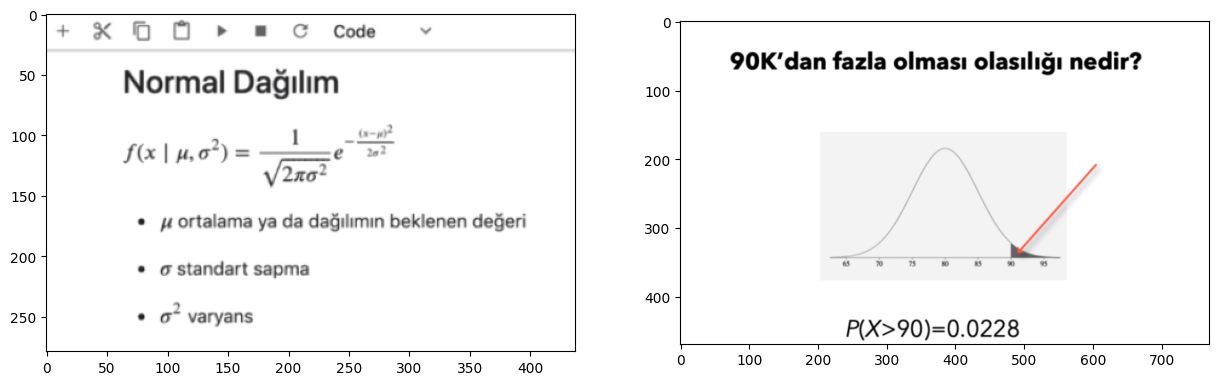

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
image = mpimg.imread("normal_dagılım.png")
image2= mpimg.imread("normal_dagılım2.png")
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.imshow(image2)
plt.show()

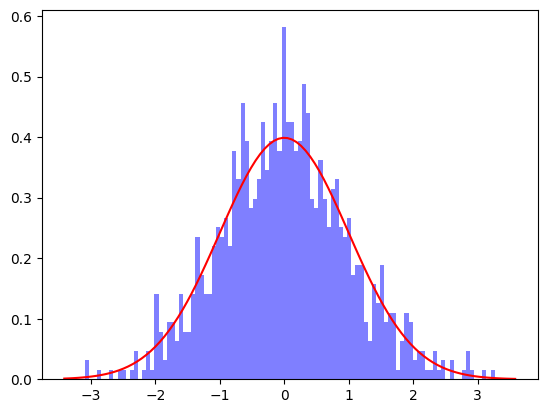

In [21]:
ortalama = 0
standart_sapma = 1

# Normal dağılımı oluştur
veri = np.random.normal(ortalama, standart_sapma, 1000)

# Histogramı çiz
plt.hist(veri, bins=100, density=True, alpha=0.5, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
teorik_dagilim = (1/(standart_sapma * np.sqrt(2 * np.pi))) * np.exp(-(x - ortalama)**2 / (2 * standart_sapma**2))
plt.plot(x, teorik_dagilim, color='r')

# Grafiği göster
plt.show()

In [2]:
from scipy.stats import norm
1-norm.cdf(90,80,5)             #normal eğri altında kalan alan  '1'  e eşit  bize ise belirli bir integral kısmı  lazım
                                #90 dan büyük olma olasılığı 80 ortalama  5 standart sapma 

0.02275013194817921

In [3]:
mean = 80
std = 5
x = 70
probability = norm.cdf(x, mean, std)
print(probability)                         #70 dan büyük olma olasılığı 80 ortalama 5 standart sampma

0.0227501319481792


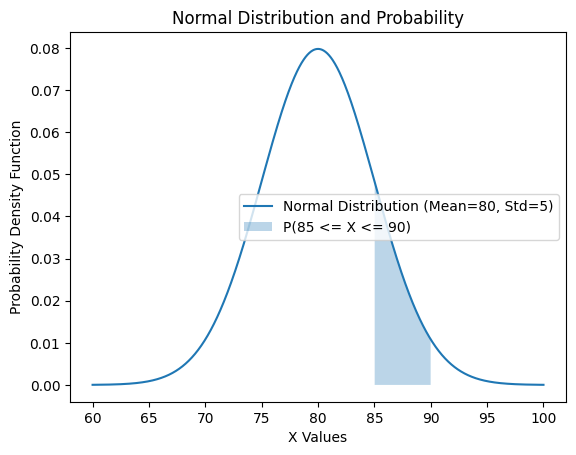

In [6]:
# Normal dağılım parametreleri
mean = 80
std = 5

# X değerlerini oluştur
x_values = np.linspace(60, 100, 1000)

# Normal dağılımın olasılık yoğunluk fonksiyonunu hesapla
pdf_values = norm.pdf(x_values, mean, std)

# X değerlerini ve olasılıkları içeren bir grafik oluştur
plt.plot(x_values, pdf_values, label='Normal Distribution (Mean=80, Std=5)')
plt.fill_between(x_values, pdf_values, where=[(x >= 85 and x <= 90) for x in x_values], alpha=0.3, label='P(85 <= X <= 90)')
plt.title('Normal Distribution and Probability')
plt.xlabel('X Values')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

# X değerleri arasında kalan olasılığı gösteren bir grafik oluşturur. 
# Dolaylı olarak, norm.cdf(90, 80, 5) - norm.cdf(85, 80, 5) ifadesindeki değeri de gösterir. 



> ## <span style="color:orange">**Hipotez Testi**</span>

**Bir inanışı (bir savı,bir tahmini vs) test etmek için kullanılan istatistksel bir teknik.** 

Hipotez testi, bir örnek veri seti kullanarak bir popülasyon hakkında çıkarımlarda bulunmaya yönelik bir istatistiksel analiz yöntemidir. Hipotez testi sonuçları, dört temel hata tipine yol açabilir. Bu hatalar şunlardır:

1. **Tip I Hatası (Alfa Hatası):**
   - **H0 Doğru İken H0 Reddedilirse.**
   - Tip I hatası, aslında doğru olan bir H0 hipotezinin yanlışlıkla reddedilmesidir.
   - Alfa seviyesi (α) olarak adlandırılan belirli bir anlamlılık düzeyini geçerse gerçekleşir.
   - Örneğin, α = 0.05 seviyesinde bir tip I hatası, gerçekte hiçbir etki olmadığında yanlış bir şekilde etki olduğunu düşünmek anlamına gelir.

2. **Tip II Hatası (Beta Hatası):**
   - **H0 Yanlış İken H0 Kabul Edilirse.**
   - Tip II hatası, aslında yanlış olan bir H0 hipotezinin yanlışlıkla kabul edilmesidir.
   - Beta (β) ile ifade edilir.
   - Güç (Power) = 1 - β formülüyle ifade edilir; yani güç, H0'ı reddetme yeteneğidir.
   - Büyük bir tip II hatası, gerçekte bir etki olmasına rağmen hiçbir etki olmadığını düşünmek anlamına gelir.

3. **Güç (Power):**
   - **H0 Yanlış İken H0 Reddedilirse.**
   - Güç, aslında yanlış olan bir H0 hipotezini doğru bir şekilde reddetme yeteneğini ifade eder.
   - Büyük bir güç, gerçek bir etki olduğunda bu etkiyi belirleme olasılığını artırır.
   - Güç, tip II hatasıyla ters orantılıdır.

4. **H0 Kabul ve H0 Reddetme Kararları:**
   - İstatistiksel test sonuçları, H0 hipotezini reddetme veya kabul etme kararlarını içerir.
   - Bu kararlar, testin belirli bir anlamlılık düzeyinde (alfa seviyesi) yapılır.
   - Anlamlılık düzeyi, tip I hatasının kabul edilebilir bir seviyede tutulmasını sağlar.
   - Örneğin, α = 0.05 anlamlılık düzeyinde, H0 reddedilirse, bu, sonuçların %5 anlamlılık düzeyinde kabul edilebilir bir tip I hatası olduğu anlamına gelir.

Hipotez testlerindeki hata tipleri arasındaki denge, testin güvenilirliğini ve sonuçlarının doğruluğunu etkiler. İdeal durumda, alfa ve beta hataları düşük, güç yüksek olmalıdır, ancak bu durumlar arasında bir denge kurulması gerekebilir.

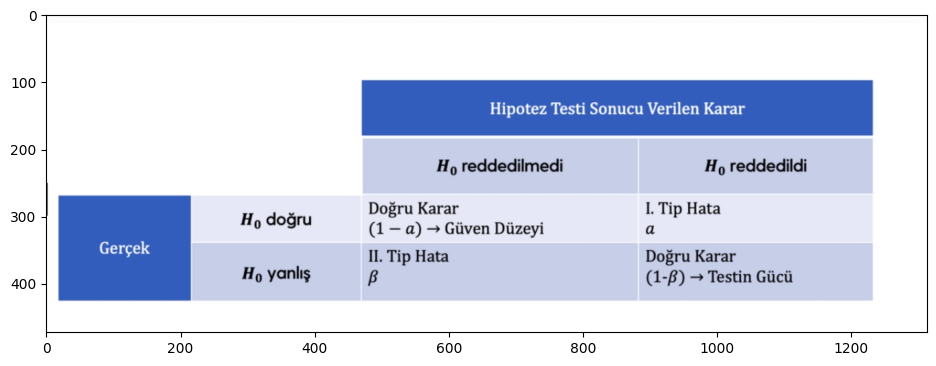

In [94]:
image = mpimg.imread("hata_tipleri.png")
plt.figure(figsize=(25,20))
plt.subplot(2,2,1);
plt.imshow(image);

> ## <span style="color:orange">**P-Value**</span>

P değeri (p-value), bir istatistiksel test sonucunda elde edilen verilerin, test edilen hipotezin doğruluğu ile çelişip çelişmediğini değerlendirmek için kullanılan bir ölçüdür. P değeri, null hipotezi (H0) reddetme kararını vermede önemli bir rol oynar.

Temel olarak, p değeri şu soruya cevap verir: "Eğer null hipotezi doğruysa, gözlemlenen verilerin bu hipotez altında bu kadar aşırı veya daha fazla olma olasılığı nedir?"

İşte p değerinin bazı temel özellikleri:

1. **P Değeri ve Null Hipotezi:**
   - Null hipotezi genellikle şu şekildedir: "İki grup arasında bir fark yoktur" veya "Bir etki yoktur."
   - Küçük bir p değeri, null hipotezinin reddedilmesine ve iki grup arasında anlamlı bir farkın veya bir etkinin olduğuna işaret edebilir.

2. **P Değeri ve Anlamlılık Düzeyi (α):**
   - P değeri, anlamlılık düzeyi (α) ile karşılaştırılır.
   - Anlamlılık düzeyi, bir testin yanlış pozitif sonuç verme olasılığını kontrol eder. Tip I hatasının kabul edilebilir seviyede tutulması önemlidir.
   - Yaygın olarak kullanılan anlamlılık düzeyleri arasında α = 0.05 ve α = 0.01 bulunur.

3. **P Değeri Yorumu:**
   - P değeri küçükse (genellikle α'dan küçükse), null hipotezi reddedilir.
   - P değeri büyükse, null hipotezi reddedilemez ve veriler null hipotezi ile uyumludur.
   - Genellikle, α'dan daha küçük bir p değeri, sonuçların istatistiksel olarak anlamlı olduğunu düşündürecektir.

4. **Örnek:**
   - Örneğin, bir t-testinde elde edilen p değeri α = 0.05'ten küçükse, iki grup arasındaki farkın istatistiksel olarak anlamlı olduğu kabul edilebilir.

5. **Dikkat Edilmesi Gerekenler:**
   - P değeri, gözlemlenen farkın büyüklüğü veya bilimsel önemi hakkında bir bilgi vermez. Sadece istatistiksel anlamlılığı değerlendirir.

Sonuç olarak, p değeri, bir istatistiksel testin sonuçlarını değerlendirmek ve null hipotezi hakkında bir çıkarım yapmak için önemli bir araçtır. Ancak, p değerinin tek başına yeterli bir ölçü olmadığı, sonuçların bağlamı, hipotezin kendisi ve diğer faktörler de dikkate alınmalıdır.

**alfa(a)=kabul edilebilir hata miktarı
a=0.05   
p<a H0 hipotezi reddedilir.    
Hipotez testlerinin sonuçlarını değerlendirmek üzere programlar tarafından p-value değeri verilir.Bu değer üzerinden kolayca yorum yapabiliriz.                                              
p<0.05 ilgili H0 hipotezini reddettiğimiz anlamına gelir.Burda H0 hipotezinin neyi iddaa ettiğini iyi bilmemiz gerekir.**

> ## <span style="color:orange">**Tek Örneklme T-Testi**</span>

 - **Tek Örneklem T-Testi, bir örneklem grubunun ortalamasının, bir popülasyonun bilinen bir değerinden (veya tahmin edilen bir değerinden) istatistiksel olarak farklı olup olmadığını değerlendirmek için kullanılır. Bu test, özellikle bir popülasyonun genel eğilimini belirlemek için bir referans değeriyle karşılaştırmak istediğiniz durumlar için uygundur.**
 
 - **Tek Örneklem T-Testi'nin kullanılmasının temel amacı, örneklem grubunun ortalamasının popülasyon ortalamasından istatistiksel olarak anlamlı bir şekilde farklı olup olmadığını belirlemektir. Bu, bir örneklemle elde edilen verilerin genel popülasyon için temsil edip etmediğini değerlendirmenize yardımcı olabilir.**

 **Hipotezler:**

**Null Hipotezi (H0):** Sınıfın sınav notları, genel popülasyonun sınav notlarıyla aynıdır.

**Alternatif Hipotez (H1):** Sınıfın sınav notları, genel popülasyonun sınav notlarından istatistiksel olarak farklıdır.

Test sonuçları, null hipotezin reddedilip edilmediğini belirleyerek öğretmene, sınıfın genel popülasyondan istatistiksel olarak farklı bir performans sergileyip sergilemediği konusunda bir bilgi sağlar.

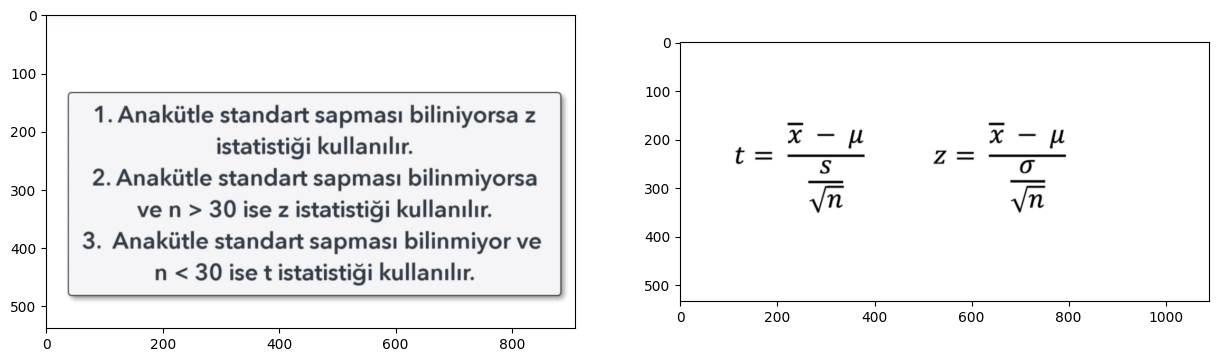

In [25]:
image = mpimg.imread("tt.png")
image2= mpimg.imread("tt2.png")
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.imshow(image2)
plt.show()

In [27]:
#Problemmiz web sitemizde geçirilen süre.
import scipy.stats as stats
olcumler =np.array([17,160,234,149,145,107,197,75,201,225,211,119,157,145,127,244,163,114,65,112,185,202,146,203,
                   224,203,114,188,156,187,154,177,95,165,50,110,216,138,151,166,135,155,54,251,173,131,207,121,120])
stats.describe(olcumler)

DescribeResult(nobs=49, minmax=(17, 251), mean=153.9591836734694, variance=2736.456632653061, skewness=-0.3754612280469661, kurtosis=-0.12767542670991228)

## <span style="color:grey">**Varsayımlar**</span>
> #### <span style="color:grey">**Normallik varsayımı**</span>

NameError: name 'pylab' is not defined

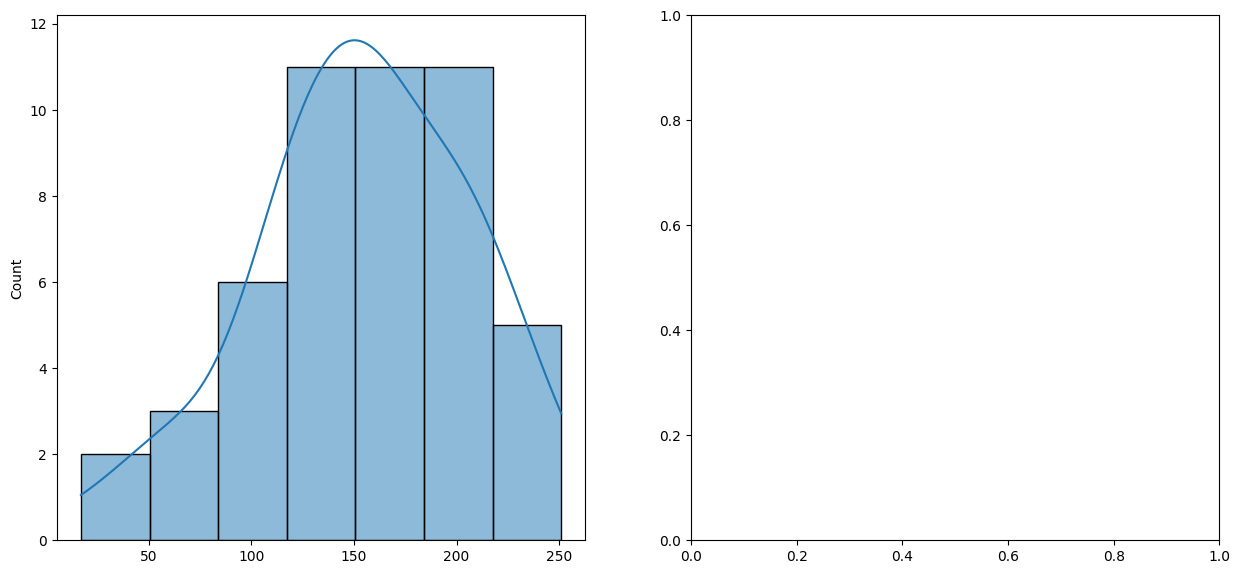

In [29]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.histplot(olcumler,kde=True) ;      #Burada görece normal bir dağılım var.
plt.subplot(2,2,2)
stats.probplot(olcumler,dist='norm',plot=pylab);   # Burdan da yine normallik kontrol edilir.

> #### <span style="color:grey">**Shapiro-Wilks Testi**</span>

- **H0:  Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak bir fark yoktur. Yani dağılım normaldir.**

- **H1: ... fark vardır. Dağılım normal değildir.**


In [32]:
from scipy import stats
# Sol taraftaki değer: Test istatistiği sağ taraftaki değer p-value=0.61, p-value>0.05 H0 reddedilmez.Yani dağılım normaldiri iddaa eder.
print('T hesap istatistik : ' + str(stats.shapiro(olcumler)[0]))
print('P-value : ' + str(stats.shapiro(olcumler)[1]))

T hesap istatistik : 0.981207013130188
P-value : 0.6167343854904175


> ## Hipotez Testinin uygulanması

- **H0:Web sitemizde geçirilen ortalam süre 170'tir**
     
- **H1: ...değildir.**

- NOT:Paremetrik test çeşitli varsayımlar sağlandığında uygulanabilir test demek.

In [31]:
print(f'p value : {stats.ttest_1samp(olcumler,popmean=170) [1]} ,Elde ettiğimiz p value değeri p<0.05 olduğu için H0 hipotezi reddedilir.Yani 170 den farklı bir değerdi')

p value : 0.036915972021914524 ,Elde ettiğimiz p value değeri p<0.05 olduğu için H0 hipotezi reddedilir.Yani 170 den farklı bir değerdi


> ## Nonparametrik Tek örneklem Testi

- **Yukarıdaki varsayım sağlanmadı(170 e göre).Gerekli olan varsayımlar sağlanmadığı durumda kullanır. Nonparemetrik tek örneklme testinde H0 hipotezi dağılım normal olmadığını iddaa eder**

In [33]:
from statsmodels.stats.descriptivestats import sign_test 
#Burada p value > 0.05 zaten biz bunu biliyorduk.Bu testin sonucu yanıltıcı.Nedeni ise yukarı da varsayımlar sağlandığı için bu testi kullanamayız. 
#p değeri (testin anlamlılık düzeyi) kullanılarak elde edilen sonuçlar yorumlanır. 
#Eğer p değeri belirli bir anlamlılık düzeyinden küçükse (örneğin, 0.05), o zaman referans değer ile medyan arasında istatistiksel olarak anlamlı bir fark olduğu iddia edilebilir.
print(f'Test İstatistiği: {sign_test(olcumler,170)[0]}')  
print(f'P-value :{sign_test(olcumler,170)[1]}')                                                              

Test İstatistiği: -6.5
P-value :0.08543313315739454


> ## <span style ="color:orange">**Tek Örneklem Oran Testi**</span>

Tek Örneklem Oran Testi (One-Sample Proportion Test), bir popülasyonun belirli bir özelliğine ait oranın, örneklem üzerinden elde edilen orandan istatistiksel olarak farklı olup olmadığını değerlendiren bir hipotez testidir. Bu test, kategorik bir özellik veya başarı oranı ile ilgili hipotez testleri yapmak için kullanılır.

Örneğin, bir üniversite mezunlarının iş bulma oranı hakkında bir popülasyon tahmini yapmak istediğinizi düşünelim. Varsayalım ki, genel popülasyonun iş bulma oranının %75 olduğunu düşünüyorsunuz. Ancak, sadece belirli bir örnekleme dayalı olarak elde ettiğiniz iş bulma oranının genel popülasyondan istatistiksel olarak farklı olup olmadığını test etmek istiyorsunuz.

Bu durumu değerlendirmek için Tek Örneklem Oran Testi şu adımları takip eder:

1. **Hipotez Kurma:**
   - **Null Hipotezi (H0):** Örneklem oranı, popülasyon oranı ile aynıdır.
   - **Alternatif Hipotez (H1):** Örneklem oranı, popülasyon oranından istatistiksel olarak farklıdır.

2. **Veri Toplama:**
   - Belirli bir örneklemden ilgili kategorik özellik (örneğin, iş bulma durumu) verilerini topla.
Oransal bir ifade test edilmek istediğinde kullanılır.

Tek Örneklem Oran Testi'nin formülü şu şekildedir:


$$
z = \frac{\hat{p} - p_0}{\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}}
$$

Bu formülde:

- \( z \): Test istatistiğini temsil eder.
- \(p^): Örneklem oranını temsil eder.
- \( p0 \): Popülasyon oranını temsil eder (null hipotezde belirtilen değer).
- \( n \): Örneklem büyüklüğünü temsil eder.

4. **P Değerini Hesaplama:**
   - Hesaplanan z-istatistiği üzerinden p değerini belirle.

5. **Karar Verme:**
   - Belirlenen anlamlılık düzeyi (örneğin, \(\alpha = 0.05\)) üzerinden p değerini karşılaştır ve null hipotezini reddet veya reddetmeme kararı ver.

Tek Örneklem Oran Testi, özellikle popülasyon oranına ilişkin bir önerme üzerinde istatistiksel çıkarımlar yapmak istediğiniz durumlarda kullanılır.

Bu formül, örneklem oranının popülasyon oranından ne kadar farklı olduğunu ölçen bir z-skoru üretir. Bu z-skorunu kullanarak, hipotez testi yapılır ve null hipotezi reddedilip edilmeyeceği belirlenir.

## Varsayımlar

- **n>30 olmalı p^:dönüşüm oranı P0 test edilmek istenen değer**

- **HO: p=0.125**
- **H1: p!=0.0125**

In [46]:
from statsmodels.stats.proportion import proportions_ztest
count =40
nobs=500
value=0.125 #test etmek sitediğimiz değer

d=proportions_ztest(count,nobs,value)

print('z test degeri : '+str(d[0]))
print('p-value degeri : '+str(d[1]))

z test degeri : -3.7090151628513017
p-value degeri : 0.0002080669689845979


- **z-test degeri**: Bu değer, oranın popülasyon oranından kaç standart sapma uzaklıkta olduğunu ifade eder. Pozitif bir değer, örnek oranının popülasyon oranından yüksek olduğunu gösterir, negatif bir değer ise düşük olduğunu gösterir.

- **p-value degeri**: Bu değer, null hipotezinin reddedilip reddedilmeyeceğini belirlemek için kullanılır. Eğer p-değeri belirli bir anlamlılık düzeyinden (genellikle 0.05) küçükse, null hipotezi reddedilir ve oranın popülasyon oranından farklı olduğu söylenir.

- Bu örnekte, p-değeri test ettiğiniz oranın belirlediğiniz popülasyon oranından istatistiksel olarak farklı olup olmadığını gösterir. Eğer p-değeri anlamlılık düzeyinden küçükse, bu durumu destekleyecek yeterli istatistiksel kanıtlar vardır ve null hipotezi reddedilir.

> ## <span style ="color:orange">**Bağımsız iki örneklem T-Testi (AB Testi)**</span>
- **İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.**

'Bağımsız İki Örneklem T-Testi', aynı özelliğe sahip iki farklı grup arasında istatistiksel olarak anlamlı bir fark olup olmadığını değerlendiren bir hipotez testidir. Bu test, genellikle bir değişiklik veya müdahalenin (örneğin, bir reklam kampanyasının etkisi) etkisini ölçmek için kullanılır. Bu test bazen "AB Testi" olarak da adlandırılır.

Bağımsız İki Örneklem T-Testi'ni uygulamak için aşağıdaki adımları takip edebilirsiniz:

1. **Hipotez Kurma:**
   - **Null Hipotezi (H0):** İki grup arasında bir fark yoktur.
   - **Alternatif Hipotez (H1):** İki grup arasında bir fark vardır.

2. **Veri Toplama:**
   - İki bağımsız grup için verileri topla. Örneğin, bir ürünün eski ve yeni bir tasarımıyla ilgili kullanıcıların memnuniyet skorları gibi.

3. **Test İstatistiğini Hesaplama:**
   - İki grup arasındaki ortalama farkı ve grupların varyanslarını kullanarak t-istatistiğini hesapla.
   
   $
   t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
   $ 
 - Burada:
- \(\bar{X_1}\) ve \(\bar{X_2}\), sırasıyla grup 1 ve grup 2'nin ortalamalarıdır.
- \(s_1^2\) ve \(s_2^2\), sırasıyla grup 1 ve grup 2'nin varyanslarıdır.
- \(n_1\) ve \(n_2\), sırasıyla grup 1 ve grup 2'nin örneklem büyüklükleridir.

4. **P Değerini Hesaplama:**
   - Hesaplanan t-istatistiği üzerinden p değerini belirle.

5. **Karar Verme:**
   - Belirlenen anlamlılık düzeyi örneğin, alpha = 0.05 üzerinden p değerini karşılaştır ve null hipotezini reddet veya reddetmeme kararı ver.

Bağımsız İki Örneklem T-Testi, özellikle bir müdahalenin etkisini değerlendirmek, iki farklı durumu karşılaştırmak veya gruplar arasında bir fark olup olmadığını anlamak için yaygın olarak kullanılan bir istatistiksel testtir.


- **A / B testi (bölme testi veya kova testi olarak da bilinir) hangisinin daha iyi performans gösterdiğini belirlemek   için bir web sayfasının veya uygulamanın iki sürümünü birbiriyle karşılaştırmanın bir yöntemidir.**

$$

$$

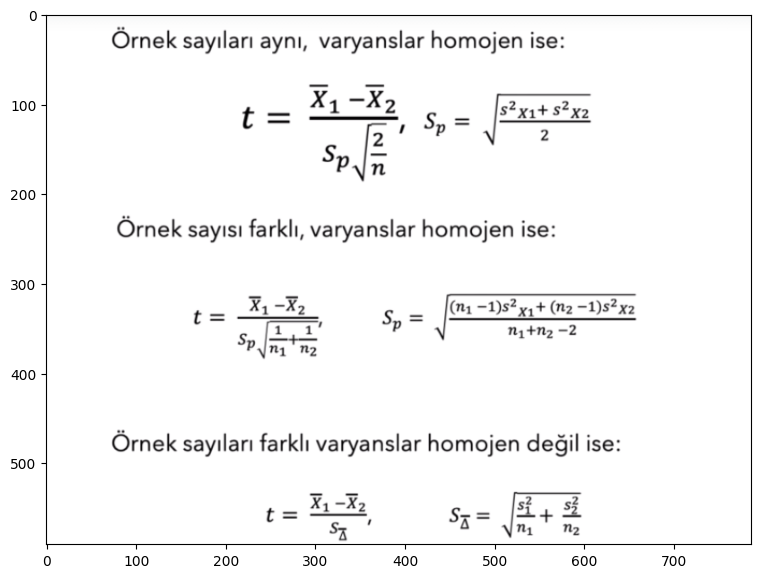

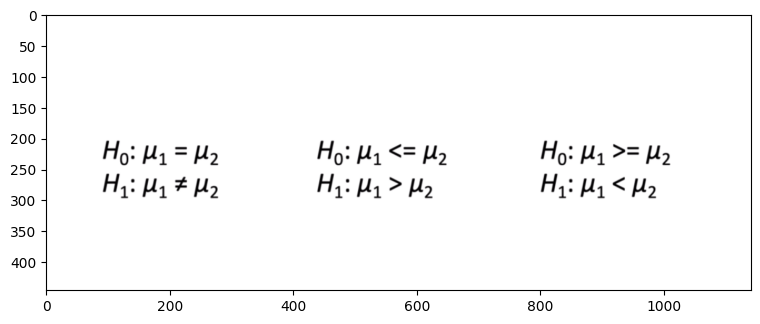

In [99]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
image = mpimg.imread("ab_test.png")
plt.figure(figsize=(20,20))
plt.subplot(2,2,1);
plt.imshow(image);
image = mpimg.imread("ab_test2.png")
plt.figure(figsize=(20,20))
plt.subplot(2,2,1);
plt.imshow(image);

In [15]:
#Verı tipi I  
#Bu işlemi veriyi fonksiyona sokmak için uygun hale getirmek için kullanırız.

In [47]:
A=pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B=pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])
A_B=pd.concat([A,B],axis=1)
A_B.columns=['A','B']
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [11]:
#Veri tipi II

In [48]:
A=pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B=pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A =np.arange(len(A))
GRUP_A=pd.DataFrame(GRUP_A)
GRUP_A[:]='A'
A=pd.concat([A,GRUP_A],axis=1)

#B ve B'nın grubu
GRUP_B =np.arange(len(B))
GRUP_B=pd.DataFrame(GRUP_B)
GRUP_B[:]='B'
B=pd.concat([B,GRUP_B],axis=1)
#tum veri
AB=pd.concat([A,B])
AB.colums=['gelir','GRUP']
AB[:10]

C:\Users\Prestij\AppData\Local\Temp\ipykernel_1532\1907851592.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  AB.colums=['gelir','GRUP']


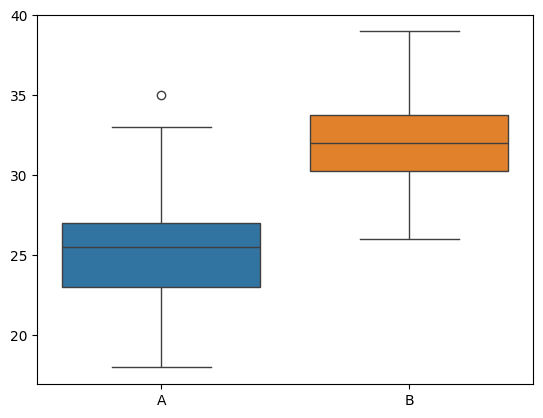

In [100]:
sns.boxplot(data=A_B); #  Burda zaten gözlemliyoruz ki sarı olan B grubunun ortalaması daha yüksek ama biz yine de bir test yapıp istatistiksel olarak bunu kanıtlamaya ccalşıyoruz.

> ### Varsayım kontrolleri 


 - **Normallik testi**

In [59]:
from scipy.stats import shapiro
print(f'p value : {shapiro(A_B.A)[1]} ,A daki veriler için , H0 hipotezini reddemeyiz p-value>0.05 dağılımımız normaldır.')    ;
print(f'p value : {shapiro(A_B.A)[1]} ,B deki veriler için , H0 hipotezini reddemeyiz p-value>0.05 dağılımımız normaldır.')    ;


p value : 0.7962851524353027 ,A daki veriler için , H0 hipotezini reddemeyiz p-value>0.05 dağılımımız normaldır.
p value : 0.7962851524353027 ,B daki veriler için , H0 hipotezini reddemeyiz p-value>0.05 dağılımımız normaldır.


**Varyans homojenliği testi**

**İki değişkeni karşılaştırdığımız için vayans homojenliğini kontorl ediyoruz**

- H0: Varyansalar homojendir.
- H1: Varyasnlar homojen değildir.

In [61]:
print(f'p value : {stats.levene(A_B.A,A_B.B)[1]} ,H0 dipotezini rededemeyiz.p>0.05 ,Varyans homojenliği varsayımını reddemeyiz.') 

p value : 0.2964124900636569 ,H0 dipotezini rededemeyiz.p>0.05 ,Varyans homojenliği varsayımını reddemeyiz.


> ### Hipotez Testi

`stats.ttest_ind` fonksiyonu, iki bağımsız örneklem arasında istatistiksel olarak anlamlı bir fark olup olmadığını test etmek için kullanılır. Bu fonksiyon, Student'un t-testini uygular.

İki ana parametre alır:

1. **İlk grup verileri (`A_B['A']`):** Bu, karşılaştırma yapmak istediğiniz birinci grup verileridir.
   
2. **İkinci grup verileri (`A_B['B']`):** Bu, karşılaştırma yapmak istediğiniz ikinci grup verileridir.

`equal_var` parametresi, varsayılan olarak `True` olarak ayarlanmıştır. Bu durumda, iki grup için varyansın eşit olduğunu varsayar. Eğer `equal_var=False` olarak ayarlanırsa, varyansların eşit olmadığı kabul edilir ve Welch's t-testi uygulanır.

Sonuçlar arasında bir t-test istatistiği ve p değeri bulunur. P değeri, iki grup arasındaki farkın istatistiksel olarak anlamlı olup olmadığını belirler. Düşük bir p değeri (< 0.05 genellikle kullanılır) genellikle iki grup arasındaki farkın istatistiksel olarak anlamlı olduğunu gösterir.

Bu kod, `A_B` veri çerçevesindeki 'A' ve 'B' grupları arasındaki t-test istatistiğini ve p değerini hesaplar.

In [65]:
from scipy import stats
# A_B veri çerçevesinde 'A' ve 'B' grupları
t_statistic, p_value = stats.ttest_ind(A_B['A'], A_B['B'], equal_var=True)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print('p<0.05 ,H0 hipotezini reddettik yani ortalamaları eşit değil')

T-Statistic: -7.028690967745927
P-Value: 2.6233215605475075e-09
p<0.05 ,H0 hipotezini reddettik yani ortalamaları eşit değil


> ## <span style ="color:orange">**Nonparametrik Bağımsız İki Örneklem Testi**</span>


- **Varsayımlar gerçekleşmediği zaman yapılır.**


`stats.mannwhitneyu` fonksiyonu, Mann-Whitney U testini uygular. Mann-Whitney U testi, iki bağımsız örneklem arasında medyan değerlerinin istatistiksel olarak farklı olup olmadığını test etmek için kullanılır. Bu test, özellikle bağımsız örneklem t-testinin varsayımlarının karşılanmadığı durumlarda (örneğin, veriler normal dağılmıyorsa) kullanışlıdır.

Fonksiyon, iki ana parametre alır:

1. **İlk grup verileri (`A_B['A']`):** Bu, karşılaştırma yapmak istediğiniz birinci grup verileridir.
   
2. **İkinci grup verileri (`A_B['B']`):** Bu, karşılaştırma yapmak istediğiniz ikinci grup verileridir.

Sonuç olarak, Mann-Whitney U istatistiği ve p değeri döner. P değeri, iki grup arasındaki medyan farkının istatistiksel olarak anlamlı olup olmadığını belirler. Düşük bir p değeri (< 0.05 genellikle kullanılır) genellikle iki grup arasındaki medyan farkının istatistiksel olarak anlamlı olduğunu gösterir.

In [67]:
from scipy import stats

# A_B veri çerçevesinde 'A' ve 'B' grupları
u_statistic, p_value = stats.mannwhitneyu(A_B['A'], A_B['B'])

print("Mann-Whitney U Statistic:", u_statistic)
print("P-Value:", p_value)

# Bu kod, `A_B` veri çerçevesindeki 'A' ve 'B' grupları arasında Mann-Whitney U istatistiğini ve p değerini hesaplar.

Mann-Whitney U Statistic: 89.5
P-Value: 9.557950378612535e-08


> ## <span style ="color:orange">**Bağımlı İki Örneklem T-testi**</span>

Bağımlı iki örneklem t-testi (Paired Sample t-test veya Dependent Sample t-test), aynı bireyler veya nesneler üzerinde iki farklı koşul altında alınan örneklem verileri arasında istatistiksel olarak anlamlı bir fark olup olmadığını değerlendiren bir hipotez testidir.

Bu test, örneklem verilerinin normal dağıldığı ve verilerin birbirinden bağımsız olmadığı durumlar için kullanılır. Bağımlı iki örneklem t-testi, genellikle aynı bireyler üzerinde yapılan bir müdahalenin (tedavi, eğitim vb.) öncesi ve sonrası durumlarını karşılaştırmak için kullanılır.

Testin hipotezleri şu şekildedir:

- **Null Hypothesis (H0):** İki koşul arasında herhangi bir fark yoktur.
- **Alternative Hypothesis (H1):** İki koşul arasında istatistiksel olarak anlamlı bir fark vardır.
Bu testin sonucunda elde edilen t istatistiği ve p değeri, null hipotezin reddedilip edilemeyeceğini belirler. Düşük bir p değeri (genellikle 0.05'ten küçük) null hipotezin reddedilmesi için yeterli kanıt olarak kabul edilir, bu da iki koşul arasında bir fark olduğunu gösterir.

Python'da, bu testi gerçekleştirmek için `scipy` kütüphanesindeki `stats.ttest_rel` fonksiyonunu kullanabilirsiniz. Örnek bir kullanım şu şekildedir:

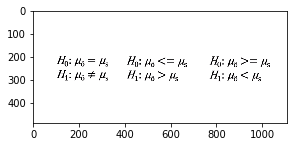

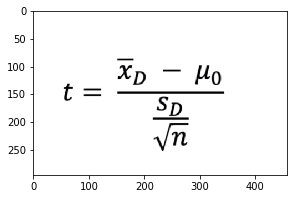

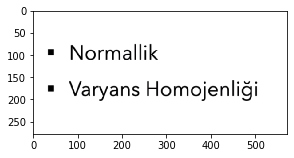

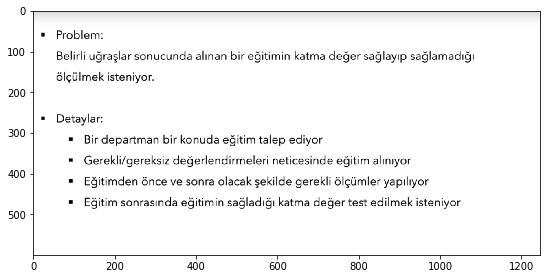

In [172]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("bagımlı_iki_orneklem.png")
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(image)
image = mpimg.imread("bagımlı_iki_orneklem2.png")
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
plt.imshow(image)
image = mpimg.imread("bagımlı_iki_orneklem3.png")
plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
plt.imshow(image)
image = mpimg.imread("problem.png")
plt.figure(figsize=(20,20))
plt.subplot(2,2,4)
plt.imshow(image)

In [77]:
oncesi=pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,121,118,124,121,125,115,115,119,118,121,117,117,120,120,121,
                    117,118,117,123,118,124,121,115,118,125,115])
sonrasi=pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,134,134,124,140,134,129,129,138,134,124,122,126,133,127,
                     130,130,130,132,117,130,125,129,133,120,127,123])


ab=pd.concat([oncesi,sonrasi],axis=1)
ab.columns=['öncesi','sonrasi']
ab[:5]
# Bu örnekte, `öncesi` ve `sonrasi` adlı iki örneklem arasında bağımlı iki örneklem t-testi gerçekleştirilmiştir.

,öncesi,sonrasi
0,123,118
1,119,127
2,119,122
3,116,132
4,123,129


<Axes: >

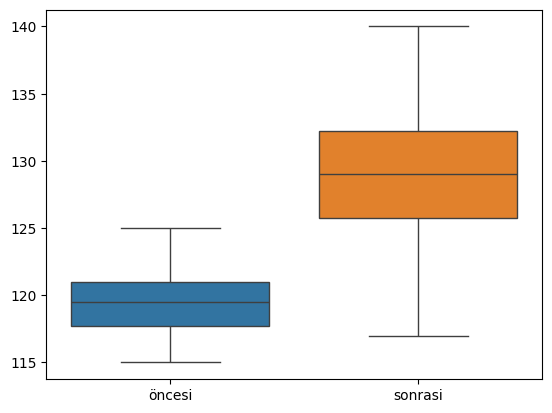

In [76]:
sns.boxplot(ab)

> ### Varsayım kontrolleri 

In [202]:
#normal dağılım kontrolu 
from scipy.stats import shapiro    #normal dağılımı inceler p-value>0.05H0 hipotezini kabul  eder 'HO:dağılım normaldir' .
shapiro(ab.oncesi)
shapiro(ab.sonrasi)
#varyans homojenliği 
stats.levene(ab.oncesi,ab.sonrasi)    #p<0.05 varyanslar homojen değil HO hipotezini reddeder.

> ### Hipotez testi

In [208]:
stats.ttest_rel(ab.oncesi,ab.sonrasi)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [209]:
test_istatistiği,pvalue=stats.ttest_rel(ab.oncesi,ab.sonrasi)     
print('test_istatistiği : %.4f \npvalue: %.4f' %(test_istatistiği,pvalue)) 

test_istatistiği : -9.2815 
pvalue: 0.0000


> ## <span style ="color:orange">**Nonparametrik Bağımlı iki örneklem testi**</span>

In [213]:
stats.wilcoxon(ab.oncesi,ab.sonrasi)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [214]:
test_istatistiği,pvalue=stats.wilcoxon(ab.oncesi,ab.sonrasi)

print('test_istatistiği : %.4f \npvalue: %.4f' %(test_istatistiği,pvalue)) 

test_istatistiği : 15.0000 
pvalue: 0.0000


> ## <span style ="color:orange">**İki Örneklem Oran Testi  (AB testi)**</span>
iki oran arasında karşılaştırma yapmak için kullanılır.


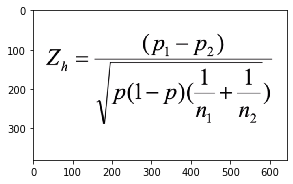

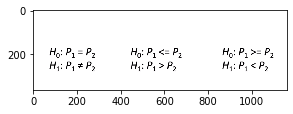

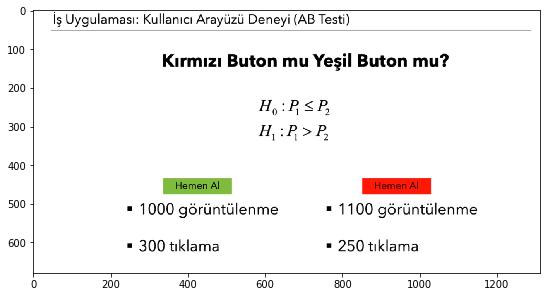

In [228]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("ıkı_orneklem_oran.png")
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(image)
image = mpimg.imread("ıkı_orneklem_oran2.png")
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(image)
image = mpimg.imread("ıkı_orneklem_oran3.png")
plt.figure(figsize=(20,20))
plt.subplot(2,2,2)
plt.imshow(image)

In [217]:
from statsmodels.stats.proportion import proportions_ztest

In [219]:
basari_sayisi=np.array([300,250])
gozlem_sayilari=np.array([1000,1100])

In [222]:
proportions_ztest(count=basari_sayisi,nobs=gozlem_sayilari)   #pvalue<0.05 Ho hipotezi reddedilir.  varsayım n>30 zaten çoğu zaman 30 dan buyuktur o yüzden dikket çekmedik.

(3.7857863233209255, 0.0001532232957772221)

> ## <span style ="color:orange">**Varyans Analizi**</span>

- **İki yada daha fazla grup ortalaması arsında istatiksel olarak anlamlı farklılık olup olmadıgını öğrenmek istenildiğinde kullanılır.**

- **Varsayımlar**

- **Gözlemlerin birbirinden bağımsız olmass(grupların)**
- **Normal dağılım**
- **Varyans homojenliği**

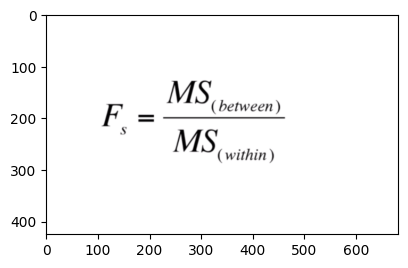

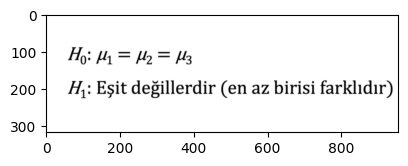

In [128]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("varyans_analiz.png")
plt.figure(figsize=(10,10));
plt.subplot(2,2,1);
plt.imshow(image);
image = mpimg.imread("varyans_analiz2.png")
plt.figure(figsize=(10,10));
plt.subplot(2,2,1);
plt.imshow(image);

In [105]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])
B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])
C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])
dfs = [A, B, C]
ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


> ### Varsayım kontrolu 

In [124]:
from scipy.stats import shapiro
shapiro(ABC['GRUP_A'])  #dağılımlar normaldır H0 reddedilemez
test_statistic, p_value = shapiro(ABC['GRUP_A'])
print(f'Test İstatistiği: {test_statistic}, P Değeri: {p_value}')

test_statistic, p_value = shapiro(ABC['GRUP_B'])
print(f'Test İstatistiği: {test_statistic}, P Değeri: {p_value}')

test_statistic, p_value = shapiro(ABC['GRUP_C'])
print(f'Test İstatistiği: {test_statistic}, P Değeri: {p_value}')

test_statistic, p_value =stats.levene(ABC['GRUP_A'],ABC['GRUP_B'],ABC['GRUP_C'])   
print(f'Test İstatistiği: {test_statistic}, P Değeri: {p_value} ,varyanslar homojen H0 reddedilemez')


ShapiroResult(statistic=0.969743013381958, pvalue=0.5321670174598694)

Test İstatistiği: 0.969743013381958, P Değeri: 0.5321670174598694
Test İstatistiği: 0.9789853096008301, P Değeri: 0.7979751229286194
Test İstatistiği: 0.9579201340675354, P Değeri: 0.273820161819458
Test İstatistiği: 1.0267403645055275, P Değeri: 0.36247110117417086 ,varyanslar homojen H0 reddedilemez


### Hipotez testi

In [126]:
from scipy.stats import f_oneway
test_statistic, p_value =f_oneway(ABC['GRUP_A'],ABC['GRUP_B'],ABC['GRUP_C'])
print(f'Test İstatistiği: {test_statistic}, P Değeri: {p_value} ')


Test İstatistiği: 74.69278140730431, P Değeri: 1.3079050746811494e-19 


In [127]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


> ## <span style ="color:orange">**Nonparametrik Hipotez Testi**</span>

In [130]:
from scipy.stats import kruskal
test_statistic, p_value =kruskal(ABC['GRUP_A'],ABC['GRUP_B'],ABC['GRUP_C']) 
print(f'Test İstatistiği: {test_statistic}, P Değeri: {p_value}, H0 hipotezi reddedilir')

Test İstatistiği: 54.19819735523783, P Değeri: 1.7022015426175924e-12,H0 hipotezi reddedilir.


> ## <span style ="color:orange">**KOLERASYON ANALİZİ**</span>
- **Değişkenler arasındaki ilişki,bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir.**

Korelasyon analizi, iki değişken arasındaki ilişkiyi değerlendiren bir istatistiksel yöntemdir. Korelasyon varsayımları, korelasyon katsayılarının güvenilir bir şekilde yorumlanabilmesi ve kullanılabilmesi için dikkate alınması gereken temel önermelerdir. İşte korelasyon varsayımları:

1. **Normallik Varsayımı:**
   - Korelasyon katsayıları genellikle değişkenlerin normal dağılıma sahip olduğunda daha güvenilir olarak kabul edilir.
   - Bu varsayım, korelasyon analizi sonuçları üzerindeki güvenilirliği artırmak için önemlidir.

2. **Doğrusallık Varsayımı:**
   - Korelasyon analizi, iki değişken arasındaki ilişkinin doğrusal bir ilişki olduğunu varsayar. Eğer ilişki doğrusal değilse, korelasyon katsayıları güvenilir olmayabilir.

3. **Aykırı Gözlem ve Uç Değerlerin Etkisi:**
   - Aykırı gözlemler ve uç değerler, korelasyon analizini etkileyebilir. Bu değerlerin analizden önce incelenmesi ve gerekirse düzeltilmesi önemlidir.

4. **Homoscedasticity (Homojen Varyans) Varsayımı:**
   - Homoscedasticity, değişkenler arasındaki değişkenliğin eşit olduğu anlamına gelir. Korelasyon analizi için bu varsayım önemlidir.

5. **Bağımsızlık Varsayımı:**
   - Gözlemler arasında bağımsızlık varsayımı önemlidir. Örneğin, zamanla ilişkili gözlemler yapıldığında, bu bağımsızlık varsayımı ihlal edilebilir.

Bu varsayımlar, korelasyon analizi sonuçlarının güvenilirliğini artırmaya yöneliktir. Ancak, bazı durumlarda bu varsayımlar tam olarak karşılanmazsa, alternatif yöntemler ve dikkatli yorumlar kullanılarak analiz yapılabilir. Örneğin, Spearman's rho veya Kendall's tau gibi parametrik olmayan korelasyon katsayıları, doğrusallık varsayımının karşılanmadığı durumlarda kullanılabilir.

In [79]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df["total_bill"] = df["total_bill"] - df["tip"]
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


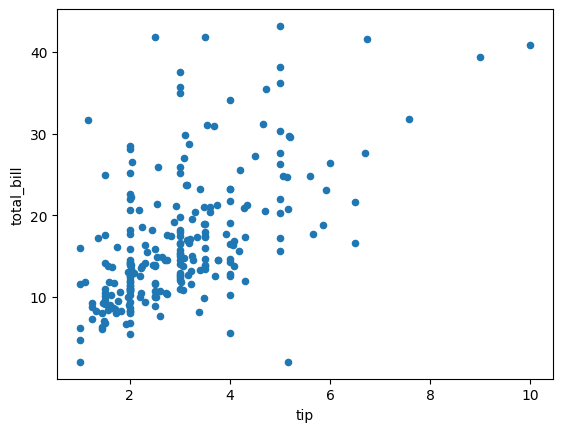

In [80]:
df.plot.scatter("tip","total_bill");

### Varsayım Kontrolu

In [81]:
from scipy.stats import shapiro
test_istatistigi, pvalue = shapiro(df["tip"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(df["total_bill"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))    # not H0 hipotezi rededilmiştir.(yani örnek dağılı normal dağılmamıştır)

Test İstatistiği = 0.8978, p-değeri = 0.0000
Test İstatistiği = 0.9136, p-değeri = 0.0000


> ### Hipotez testi

**Kolerasyon katsayısı**

In [86]:
df['tip'].corr(df['total_bill'])

0.5766634471096378

In [87]:
df['tip'].corr(df['total_bill'],method='spearman')

0.593691939408997

**Kolerasyon anlamlılığı testi**

In [254]:
from scipy.stats import pearsonr

In [256]:
test_istatistigi,pvalue=pearsonr(df['tip'],df['total_bill'])
print('test istatistiği =%.4f , p-value =%.4f' % (test_istatistigi,pvalue)) #p<0.05 oldupundan h0 hipotezi rededildi 

test istatistiği =0.5767 , p-value =0.0000


> ## <span style ="color:orange">**Nonparametrik hipotez testi**</span>

- **Bu test varsayımlar sağlanmadığnda uygulanır.**

In [83]:
from scipy.stats import stats
stats.spearmanr(df['tip'],df['total_bill'])     

C:\Users\Prestij\AppData\Local\Temp\ipykernel_1532\1214737775.py:2: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.spearmanr(df['tip'],df['total_bill'])


SignificanceResult(statistic=0.593691939408997, pvalue=1.2452285137560276e-24)

In [84]:
stats.kendalltau(df['tip'],df['total_bill'])

C:\Users\Prestij\AppData\Local\Temp\ipykernel_1532\2988759129.py:1: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.kendalltau(df['tip'],df['total_bill'])


SignificanceResult(statistic=0.4400790074919885, pvalue=7.131027725873621e-24)